In [1]:
from forecast import Forecast
from forecast_loader import loadForecasts
from util import testData
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults
import pandas as pd

In [2]:
vs = loadForecasts()
df = testData()

In [4]:
(~vs["aFRR_pos"].X.columns.isin(vs["aFRR_pos"].price_columns)).any()

True

<Axes: xlabel='time_UTC'>

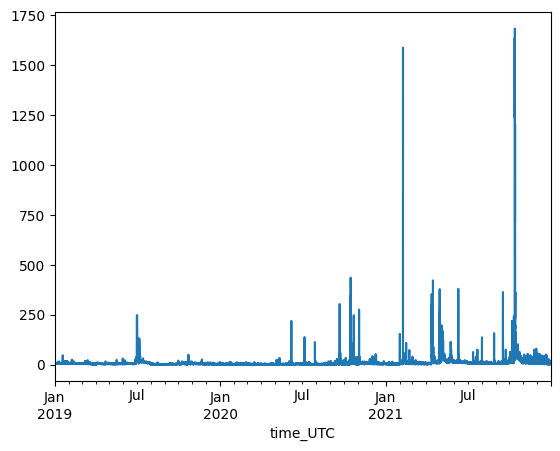

In [5]:
df["aFRR_pos_EUR_MW"].plot()

<Axes: >

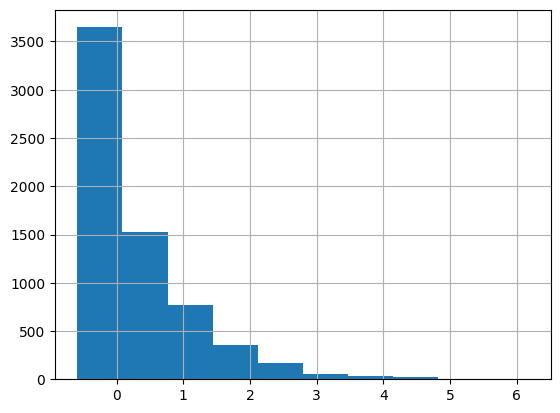

In [6]:
from inv_scaler import StandardScaler, InvScaler
y = vs["aFRR_pos"].y
scale = InvScaler()
y_scaled=y.copy()
y_scaled[:] = scale.fit_transform(y_scaled.values.reshape(-1,1)).flatten()
y_scaled.hist()

In [12]:
params ={}
for fc in vs:
    model:SARIMAXResults = vs[fc].model
    params[fc]= model.params
    # plt.figure()
    # vs[fc].y_scaled.plot()
pd.DataFrame(params)

,da,aFRR_pos,aFRR_neg,q_fern
C12,-0.028265,NaN,NaN,-0.102908
C168,0.016030,NaN,NaN,NaN
C2190,NaN,-0.079625,-0.053566,NaN
C24,-0.045871,NaN,NaN,-0.124530
C3,NaN,-0.187192,0.185408,NaN
C42,NaN,0.066867,0.073641,NaN
C6,NaN,-0.153670,0.055493,NaN
C8,0.029921,NaN,NaN,NaN
C8760,0.040296,NaN,NaN,0.582427
S12,0.004107,NaN,NaN,-0.070918


Market closure time: 2020-02-14 09:59:59
Forcast Horizon: 2020-02-15 00:00:00 - 2020-02-15 23:59:59


/home/tom/Dokumente/Uni/HIWI/PyPSA-stochUC/src/forecast/forecast.py:68: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_scaled.loc[:,~(self.X.columns.isin(self.price_columns))] = self.__scalerXOther.transform(X_other)


Market closure time: 2020-02-14 09:59:59
Forcast Horizon: 2020-02-15 00:00:00 - 2020-02-15 23:59:59


/home/tom/Dokumente/Uni/HIWI/PyPSA-stochUC/src/forecast/forecast.py:68: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_scaled.loc[:,~(self.X.columns.isin(self.price_columns))] = self.__scalerXOther.transform(X_other)


Market closure time: 2020-02-14 09:59:59
Forcast Horizon: 2020-02-15 00:00:00 - 2020-02-15 23:59:59
Market closure time: 2020-02-14 09:59:59
Forcast Horizon: 2020-02-15 00:00:00 - 2020-02-15 23:59:59


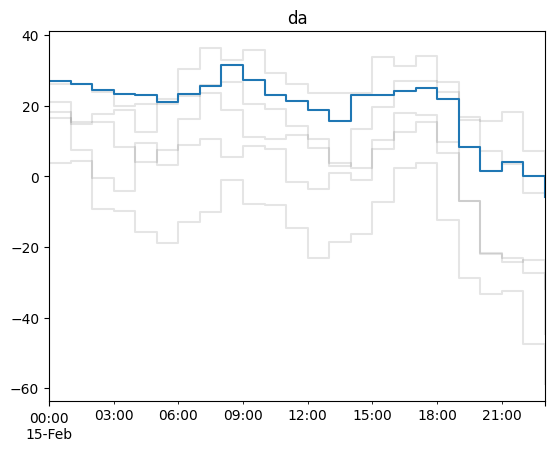

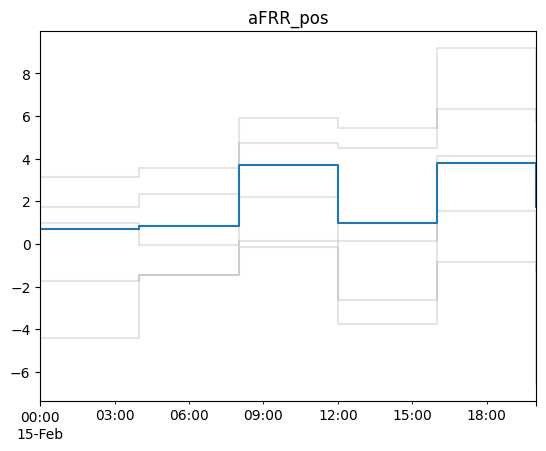

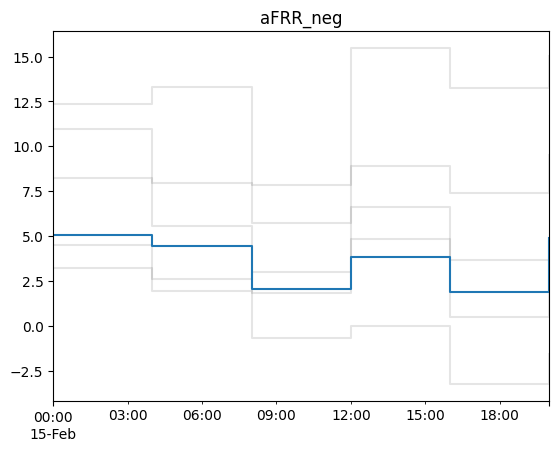

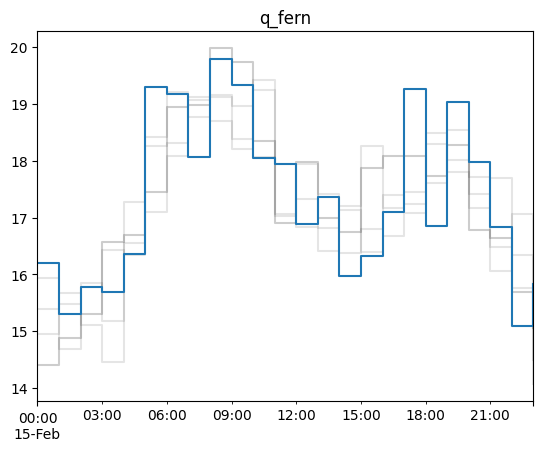

In [10]:
for k,v in vs.items():
    day="2020-02-15"
    pred = v.getClusteredForecast(10,day)[0]
    ax = pred.plot(legend=False,color="black",alpha=0.1,drawstyle="steps-post")
    actual = df.loc[pred.index,v.y_name]
    actual.plot(ax=ax,drawstyle="steps-post")
    ax.set_title(k)
